In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler



import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset
df=pd.read_csv('cross-cafe-final.csv')

In [3]:
df.head()

,Unnamed: 0,Datetime,Aaland,cross_cafe,Ziggy,cloud_cover,humidity,precip_dur_past1h,precip_past1h,pressure,...,temp_mean_past1h,temp_min_past12h,temp_min_past1h,weather,wind_dir,wind_max_per10min_past1h,wind_min_past1h,wind_speed,wind_speed_past1h,sun_last1h_glob
0,1,2018-01-02 00:00:00,0.0,0.0,0.0,NaN,94.0,0.0,0.0,989.0,...,4.0,NaN,3.7,NaN,236.0,4.3,NaN,3.9,4.0,0.0
1,2,2018-01-02 01:00:00,0.0,0.0,0.0,NaN,94.0,0.0,0.0,989.8,...,4.1,NaN,3.8,NaN,243.0,4.5,NaN,3.5,4.0,0.0
2,3,2018-01-02 02:00:00,0.0,0.0,0.0,NaN,95.0,0.0,0.0,990.1,...,3.9,NaN,3.5,100.0,237.0,4.0,NaN,3.9,3.7,0.0
3,4,2018-01-02 03:00:00,0.0,0.0,0.0,NaN,96.0,0.0,0.0,990.7,...,3.6,NaN,3.4,NaN,229.0,4.2,NaN,4.1,3.7,0.0
4,5,2018-01-02 04:00:00,0.0,0.0,0.0,NaN,97.0,0.0,0.0,991.4,...,3.5,NaN,3.0,NaN,239.0,4.3,NaN,3.0,3.6,0.0


In [4]:
# change Datetime to datetype datetime
df['Datetime'] = pd.to_datetime(df['Datetime'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29209 entries, 0 to 29208
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                29209 non-null  int64         
 1   Datetime                  29209 non-null  datetime64[ns]
 2   Aaland                    29209 non-null  float64       
 3   cross_cafe                29209 non-null  float64       
 4   Ziggy                     29209 non-null  float64       
 5   cloud_cover               28698 non-null  float64       
 6   humidity                  29024 non-null  float64       
 7   precip_dur_past1h         28792 non-null  float64       
 8   precip_past1h             28792 non-null  float64       
 9   pressure                  29182 non-null  float64       
 10  temp_dew                  29182 non-null  float64       
 11  temp_dry                  29182 non-null  float64       
 12  temp_max_past12h  

count    29209.000000
mean      1909.602739
std       2752.873080
min       -353.600000
25%          0.000000
50%        292.000000
75%       3144.400000
max      20115.200000
Name: cross_cafe, dtype: float64

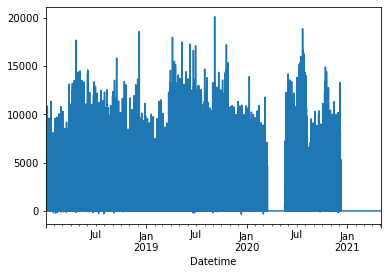

In [5]:
#set Datetime as index and plot only cross_cafe 

df.set_index('Datetime')['cross_cafe'].plot(subplots=False)
df['cross_cafe'].describe()

<AxesSubplot:xlabel='Datetime'>

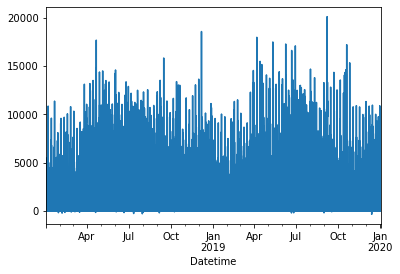

In [6]:
# cut of corona period and get dataframe for 2 years from 2018 to 2020
# this is the data we are going to use to test whether SARIMAX can yield good forecasts 
df = df[df['Datetime'] < '2020-1-2 00:00:00']
df.set_index('Datetime')['cross_cafe'].plot(subplots=False)

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
test_result=adfuller(df['cross_cafe'])

In [9]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(cross_cafe):
    result=adfuller(cross_cafe)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [10]:
adfuller_test(df['cross_cafe'])

ADF Test Statistic : -17.612993537387396
p-value : 3.871434190753603e-30
#Lags Used : 43
Number of Observations Used : 17476
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


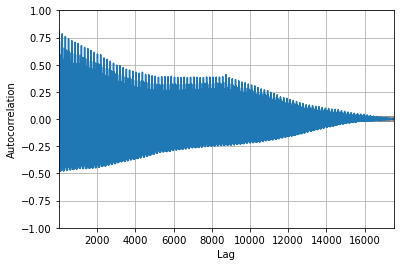

In [11]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['cross_cafe'])
plt.show()

In [12]:

#Final Thoughts on Autocorrelation and Partial Autocorrelation
#Identification of an AR model is often best done with the PACF.
#For an AR model, the theoretical PACF “shuts off” past the order of the model. 
#The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. 
#Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. 
#By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
#Identification of an MA model is often best done with the ACF rather than the PACF.

#For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. 
#A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

#p,d,q p AR model lags d differencing q MA lags

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

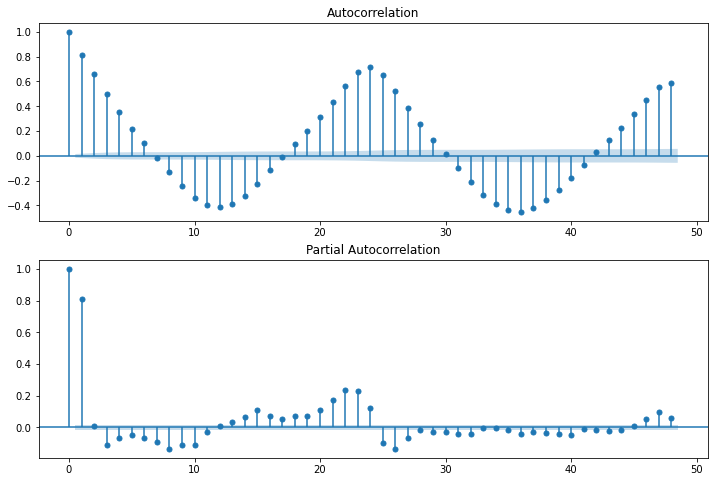

In [30]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['cross_cafe'],lags=48,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['cross_cafe'],lags=48,ax=ax2)

In [31]:
#p,d,q p AR model lags d differencing q MA lags

#p=2, d=0, q=6 or 1

In [ ]:
import statsmodels.api as sm


In [ ]:
model=sm.tsa.statespace.SARIMAX(df['cross_cafe'],order=(2, 1, 6),seasonal_order=(2,0,6,12))
results=model.fit()

In [ ]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['cross_cafe','forecast']].plot(figsize=(12,8))